In [2]:
from miscpy.utils.sympyhelpers import *
init_printing()

In [3]:
l,th,thd,thdd,mp,mq,t,TP,TQ,FPQ = symbols('l,theta,thetadot,thetaddot,m_P,m_Q,t,T_P,T_Q,F_{PQ}')
diffmap = {th:thd,thd:thdd}
iWb = Matrix([0,0,thd])
bCi = rotMat(3,(th-pi/2))

In [4]:
r_PO = Matrix([sqrt(3)*l/2,-l/2,0])
v_PO = transportEq(r_PO,t,diffmap,iWb)
r_QO = Matrix([sqrt(3)*l/2,l/2,0])
v_QO = transportEq(r_QO,t,diffmap,iWb)

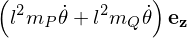

In [5]:
h_O = mp*r_PO.cross(v_PO) + mq*r_QO.cross(v_QO)
mat2vec(h_O,polarframe)

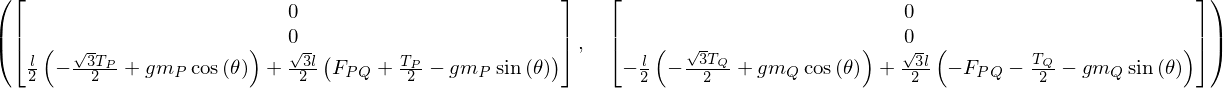

In [6]:
M_PO = r_PO.cross(Matrix([-sqrt(3)/2*TP,TP/2,0])+ Matrix([0,FPQ,0])+ bCi*Matrix([0,-mp*g,0]))
M_QO = r_QO.cross(Matrix([-sqrt(3)/2*TQ,-TQ/2,0])+ Matrix([0,-FPQ,0])+ bCi*Matrix([0,-mq*g,0]))
M_PO,M_QO

In [7]:
eom = difftotalmat(h_O,t,diffmap) - (M_PO+M_QO)

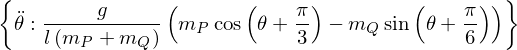

In [8]:
solve(eom,thdd)

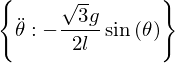

In [11]:
simplify(solve(eom.subs(mq,mp),thdd))